# Import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset.

In [2]:
import pandas as pd
df = pd.read_excel(r'car_data.xlsx')
df

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location,Price
0,Mahindra,XUV,1.2 W6 MT,NaN,"9,510 km",Petrol,1st Owner,2021,Ahmedabad,"₹10,67,499"
1,Maruti,Alto,VXI Manual,Manual,"8,339 km",Petrol,1st Owner,2016,Ahmedabad,"₹3,37,599"
2,Maruti,Ertiga,ZXI Plus SHVS Manual,Manual,"21,596 km",Petrol,2nd Owner,2020,Ahmedabad,"₹10,39,099"
3,Maruti,Swift,LXI Manual,Manual,"16,885 km",Petrol,1st Owner,2019,Ahmedabad,"₹5,82,299"
4,Volkswagen,Polo,Trendline 1.0 L Petrol Manual,Manual,"14,469 km",Petrol,1st Owner,2020,Ahmedabad,"₹5,82,999"
...,...,...,...,...,...,...,...,...,...,...
5192,Maruti,Alto,LXI Manual,Manual,"51,233 km",Petrol,1st Owner,2019,Kochi,"₹3,16,399"
5193,Maruti,Alto,VXI Manual,Manual,"76,693 km",Petrol,1st Owner,2015,Kochi,"₹2,56,899"
5194,Maruti,Eeco,5 STR WITH AC PLUSHTR Manual,Manual,"14,835 km",Petrol,1st Owner,2020,Kochi,"₹4,43,999"
5195,Hyundai,Grand,SPORTZ (O) 1.2 AT VTVT Automatic,Automatic,"23,695 km",Petrol,2nd Owner,2017,Kochi,"₹5,26,719"


In [3]:
#Get the numbers of rows and columns.
df.shape

(5197, 10)

In [4]:
#Check column of the dataframe.
df.columns

Index(['Brand', 'Model', 'Variant', 'Transmission', 'Driven_KM', 'Fuel_type',
       'No. of owners', 'Manufacture_year', 'Location', 'Price'],
      dtype='object')

In [5]:
#Get the column datatypes.
df.dtypes

Brand               object
Model               object
Variant             object
Transmission        object
Driven_KM           object
Fuel_type           object
No. of owners       object
Manufacture_year     int64
Location            object
Price               object
dtype: object

In [6]:
#Basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             5197 non-null   object
 1   Model             5197 non-null   object
 2   Variant           5197 non-null   object
 3   Transmission      5117 non-null   object
 4   Driven_KM         5197 non-null   object
 5   Fuel_type         5197 non-null   object
 6   No. of owners     5197 non-null   object
 7   Manufacture_year  5197 non-null   int64 
 8   Location          5197 non-null   object
 9   Price             5197 non-null   object
dtypes: int64(1), object(9)
memory usage: 406.1+ KB


In [7]:
#Get a count of the empty values for each column.
df.isna().sum()

Brand                0
Model                0
Variant              0
Transmission        80
Driven_KM            0
Fuel_type            0
No. of owners        0
Manufacture_year     0
Location             0
Price                0
dtype: int64

In [8]:
#Check any missing/null values in the dataset.
df.isnull().values.any()

True

<AxesSubplot:>

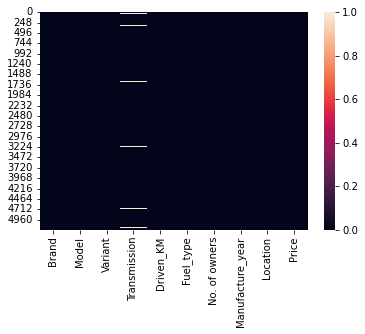

In [9]:
#Checking for null values using heatmap.
sns.heatmap(df.isnull())

In [10]:
#Replacing NA values of object type with mode using SimpleImputer function.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
df['Transmission'] = imp.fit_transform(df['Transmission'].values.reshape(-1,1))

In [11]:
#Get a count of the empty values for each column.
df.isna().sum()

Brand               0
Model               0
Variant             0
Transmission        0
Driven_KM           0
Fuel_type           0
No. of owners       0
Manufacture_year    0
Location            0
Price               0
dtype: int64

In [12]:
# Replace unnecessary values.
df['Driven_KM'] = df['Driven_KM'].str.replace('km','')
df['Driven_KM'] = df['Driven_KM'].str.replace(',','')
df['Price'] = df['Price'].str.replace('₹','')
df['Price'] = df['Price'].str.replace(',','')

In [13]:
# Get the first five rows of dataframe.
df.head()

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location,Price
0,Mahindra,XUV,1.2 W6 MT,Manual,9510,Petrol,1st Owner,2021,Ahmedabad,1067499
1,Maruti,Alto,VXI Manual,Manual,8339,Petrol,1st Owner,2016,Ahmedabad,337599
2,Maruti,Ertiga,ZXI Plus SHVS Manual,Manual,21596,Petrol,2nd Owner,2020,Ahmedabad,1039099
3,Maruti,Swift,LXI Manual,Manual,16885,Petrol,1st Owner,2019,Ahmedabad,582299
4,Volkswagen,Polo,Trendline 1.0 L Petrol Manual,Manual,14469,Petrol,1st Owner,2020,Ahmedabad,582999


In [14]:
# Convert some object type into numeric type.
df['Driven_KM'] = pd.to_numeric(df['Driven_KM'])
df['Price'] = pd.to_numeric(df['Price'])

In [15]:
# Get the column datatypes.
df.dtypes

Brand               object
Model               object
Variant             object
Transmission        object
Driven_KM            int64
Fuel_type           object
No. of owners       object
Manufacture_year     int64
Location            object
Price                int64
dtype: object

In [16]:
#Print all of the data types and their unique values.
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

Brand : ['Mahindra' 'Maruti' 'Volkswagen' 'KIA' 'Renault' 'Hyundai' 'Ford'
 'Toyota' 'Skoda' 'MG' 'Honda' 'Audi' 'Jeep' 'Tata' 'Datsun' 'Mercedes'
 'Nissan' 'BMW' 'Jaguar']
Maruti        2431
Hyundai       1185
Honda          357
Ford           255
Renault        196
Toyota         133
Tata           126
Mahindra       105
Volkswagen      77
MG              75
KIA             52
Jeep            51
Audi            43
Nissan          27
Skoda           26
Datsun          24
Mercedes        17
BMW             13
Jaguar           4
Name: Brand, dtype: int64
____________________________________________
Model : ['XUV' 'Alto' 'Ertiga' 'Swift' 'Polo' 'SELTOS' 'New' 'Kiger' 'i10' 'Thar'
 'Endeavour' 'Kwid' 'XUV500' 'Celerio' 'VENUE' 'Vitara' 'Etios' 'Baleno'
 'Eeco' 'KUSHAQ' 'HECTOR' 'Elite' 'Grand' 'Octavia' 'Amaze' 'S' 'Dzire'
 'A3' 'Jazz' 'Creta' 'IGNIS' 'Compass' 'NEW' 'AURA' 'Harrier' 'Xcent'
 'Brio' 'Eon' 'Verna' 'City' 'Rapid' 'Wagon' 'TUV300' 'Vento' 'NEXON'
 'Ecosport' 'Redi' 'i20' 'GR

# Data Analysis and Visualization

In [17]:
#summary statistics.
df.describe().style.background_gradient()

,Driven_KM,Manufacture_year,Price
count,5197.000000,5197.000000,5197.000000
mean,43790.950741,2017.169906,648476.928420
std,31013.177890,2.413196,339002.018013
min,71.000000,2008.000000,143799.000000
25%,21473.000000,2016.000000,420299.000000
50%,38225.000000,2017.000000,554699.000000
75%,60804.000000,2019.000000,765099.000000
max,400055.000000,2022.000000,3287199.000000


In [18]:
df.head()

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location,Price
0,Mahindra,XUV,1.2 W6 MT,Manual,9510,Petrol,1st Owner,2021,Ahmedabad,1067499
1,Maruti,Alto,VXI Manual,Manual,8339,Petrol,1st Owner,2016,Ahmedabad,337599
2,Maruti,Ertiga,ZXI Plus SHVS Manual,Manual,21596,Petrol,2nd Owner,2020,Ahmedabad,1039099
3,Maruti,Swift,LXI Manual,Manual,16885,Petrol,1st Owner,2019,Ahmedabad,582299
4,Volkswagen,Polo,Trendline 1.0 L Petrol Manual,Manual,14469,Petrol,1st Owner,2020,Ahmedabad,582999


<AxesSubplot:xlabel='Location', ylabel='count'>

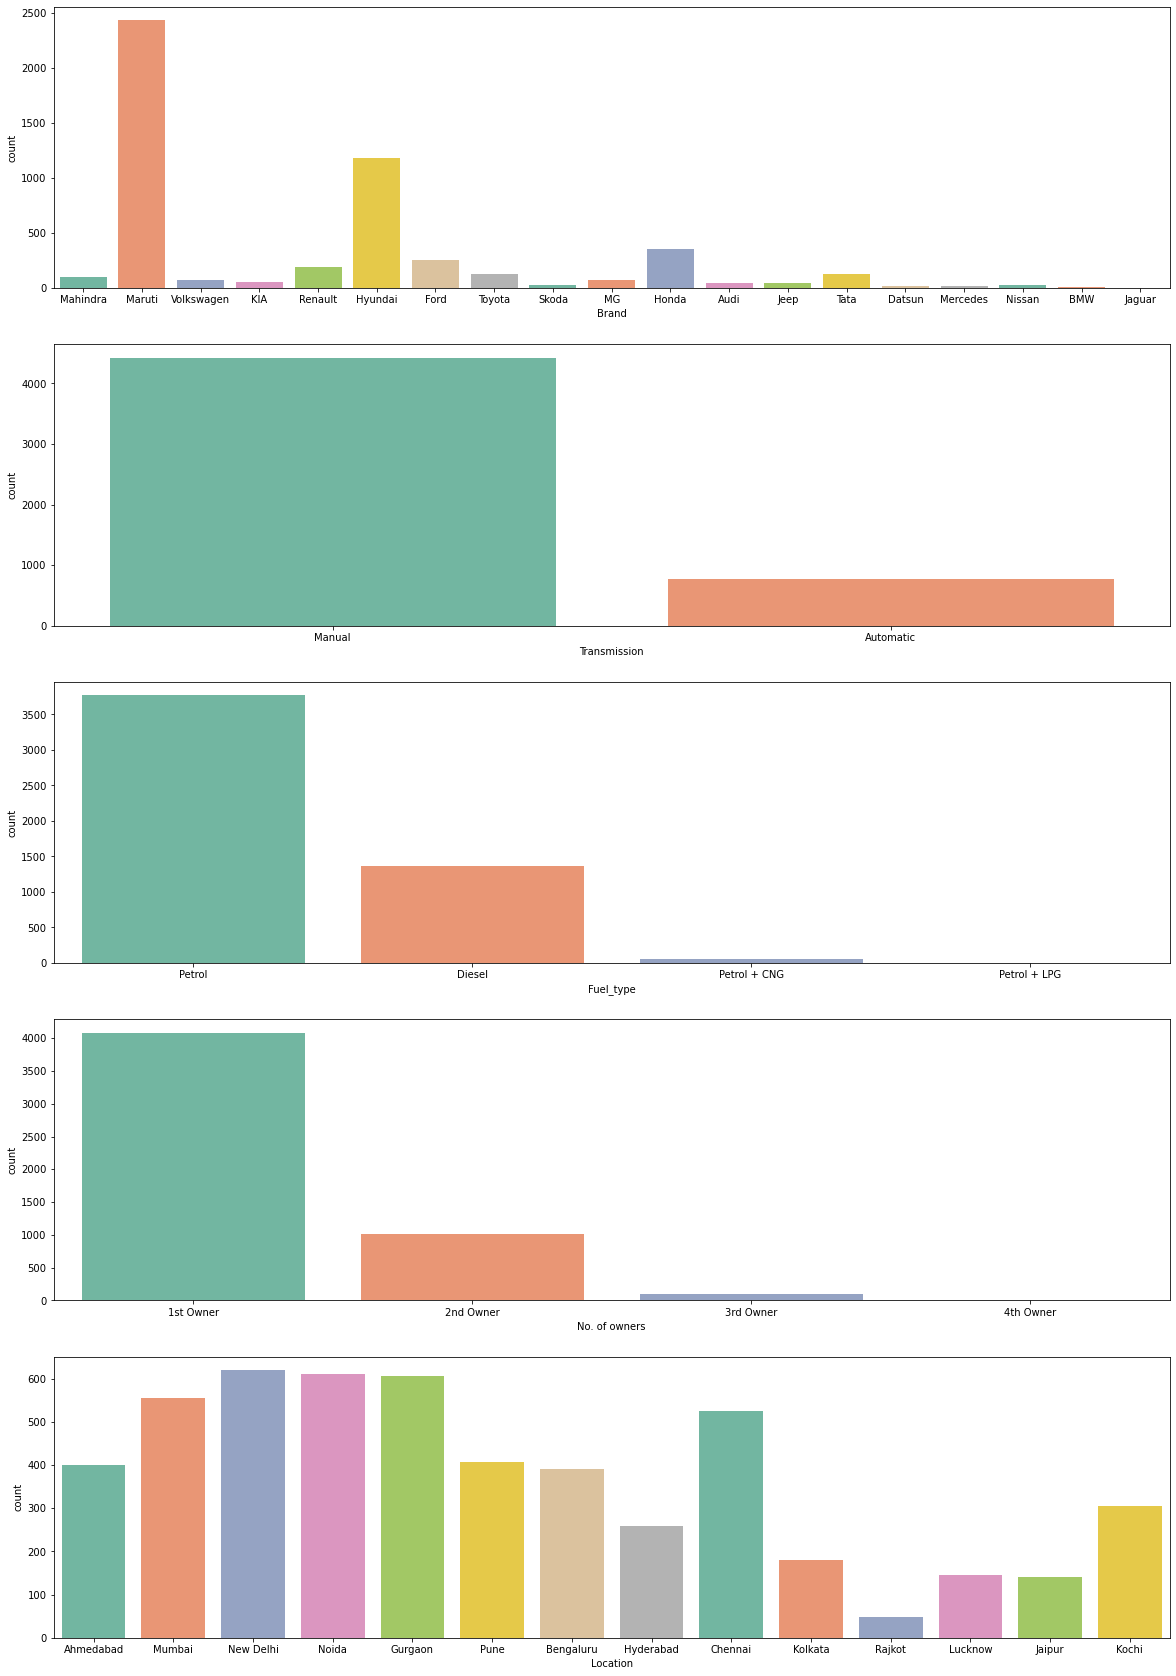

In [19]:
#Visualize the number of other independent categorical variables.
fig,ax = plt.subplots(5,1,figsize=(20,30))
sns.countplot(df['Brand'], data=df, palette='Set2',ax=ax[0])
sns.countplot(df['Transmission'], data=df, palette='Set2',ax=ax[1])
sns.countplot(df['Fuel_type'], data=df, palette='Set2',ax=ax[2])
sns.countplot(df['No. of owners'], data=df, palette='Set2',ax=ax[3])
sns.countplot(df['Location'], data=df, palette='Set2',ax=ax[4])

<AxesSubplot:xlabel='Price', ylabel='Location'>

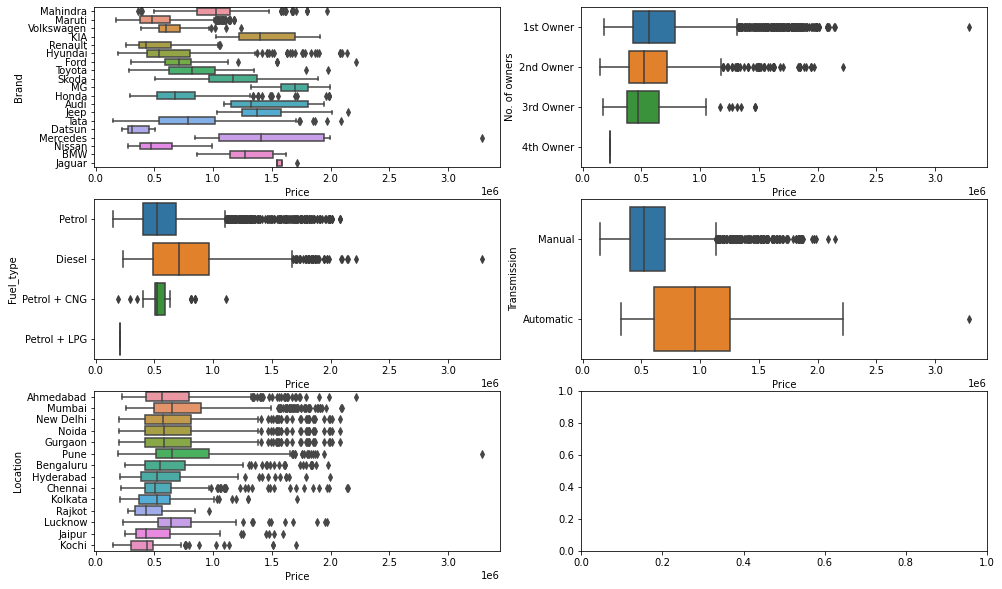

In [20]:
# display boxplot for compare price.
fig,ax = plt.subplots(3,2,figsize=(16,10))
sns.boxplot(x='Price',y='Brand',data=df,ax=ax[0][0])
sns.boxplot(x='Price',y='No. of owners',data=df,ax=ax[0][1])
sns.boxplot(x='Price',y='Fuel_type',data=df,ax=ax[1][0])
sns.boxplot(x='Price',y='Transmission',data=df,ax=ax[1][1])
sns.boxplot(x='Price',y='Location',data=df,ax=ax[2][0])

<AxesSubplot:xlabel='Manufacture_year', ylabel='Price'>

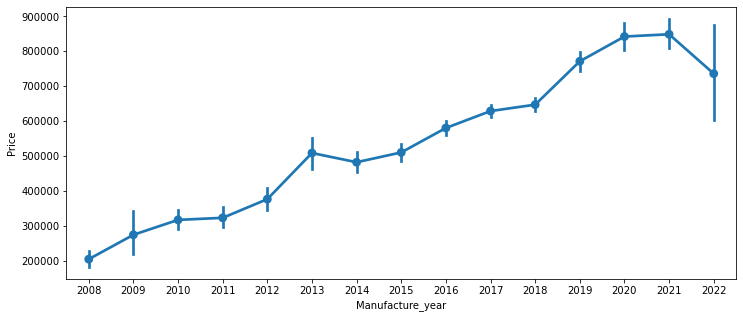

In [21]:
plt.figure(figsize=(12,5))
sns.pointplot(x = "Manufacture_year", y = "Price", data = df)

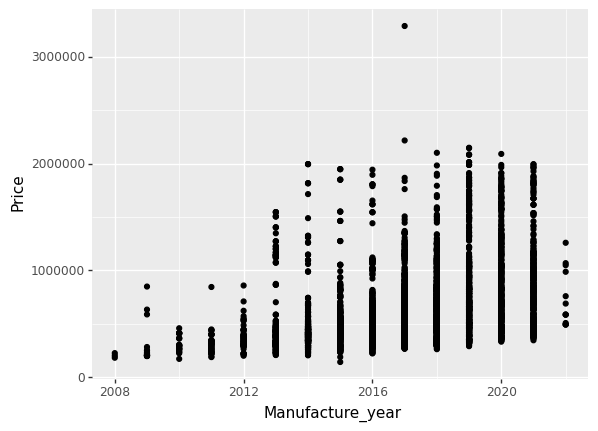

<ggplot: (124669392372)>

In [22]:
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point

(
    ggplot(df) # What data to use
    + aes(x="Manufacture_year", y="Price") # What variable to use
    + geom_point() # Geometric object to use for drawing
)

array([[<AxesSubplot:title={'center':'Driven_KM'}>],
       [<AxesSubplot:title={'center':'Manufacture_year'}>],
       [<AxesSubplot:title={'center':'Price'}>]], dtype=object)

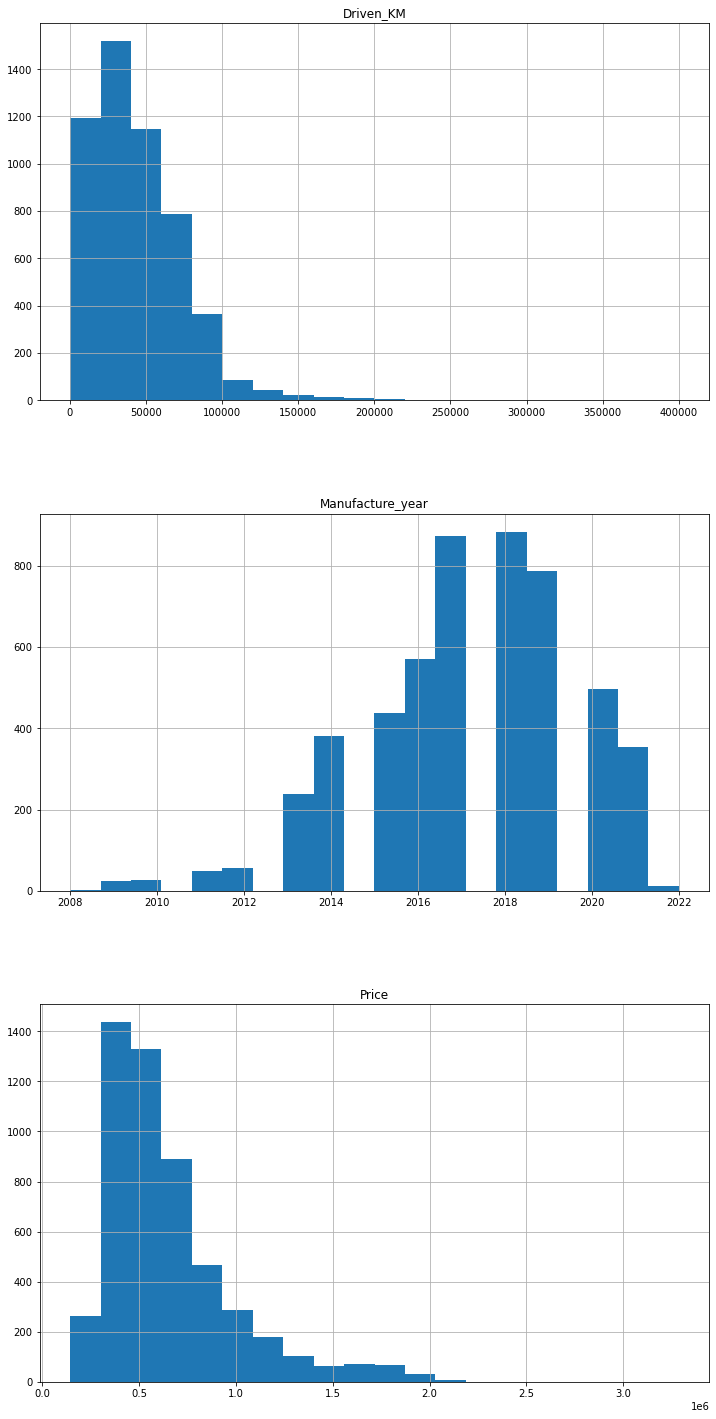

In [23]:
# display histogram of acolumns.
df.hist(figsize=(12,25), layout=(3,1), sharex=False, bins=20)

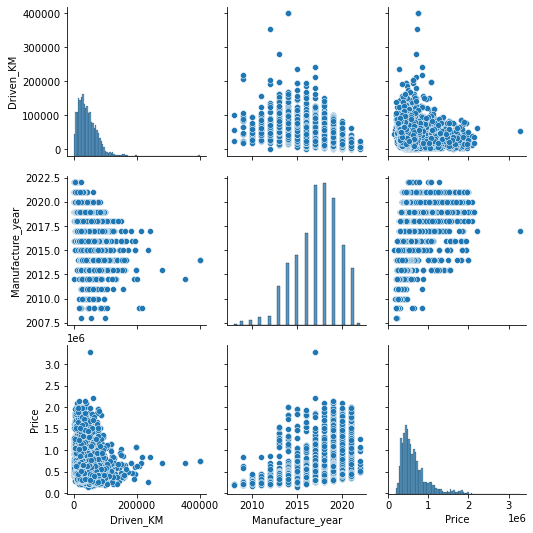

In [24]:
# display pairplot of columns.
sns.pairplot(df)

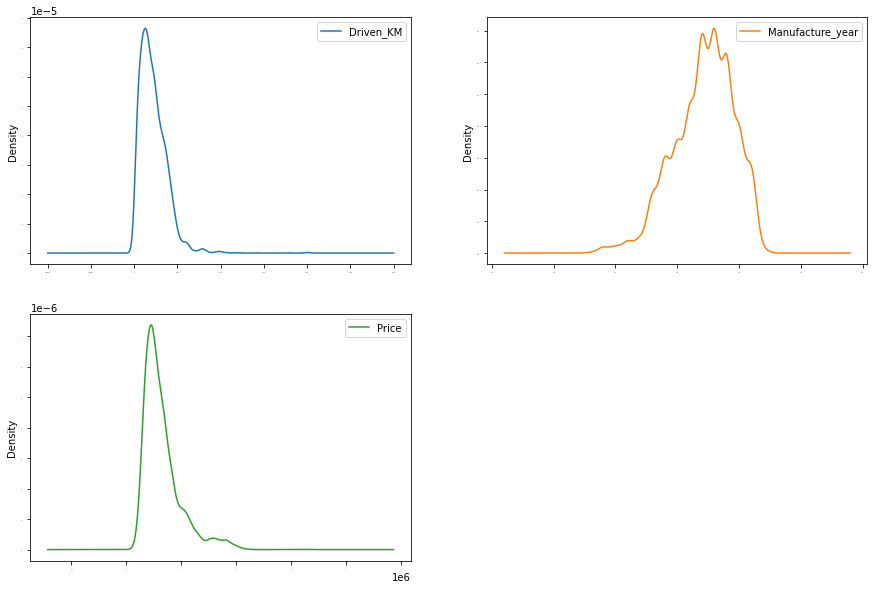

In [25]:
# Let's check the data distribution among columns.
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False, legend=True, fontsize=1, figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Driven_KM', ylabel='Density'>

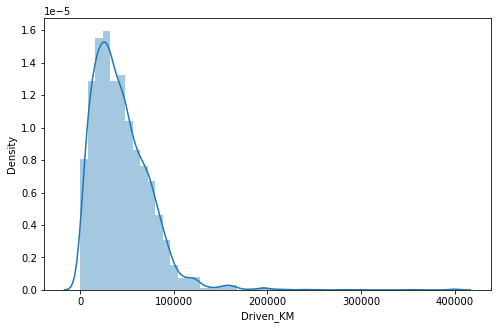

In [26]:
# display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Driven_KM'])

<AxesSubplot:xlabel='Manufacture_year', ylabel='Density'>

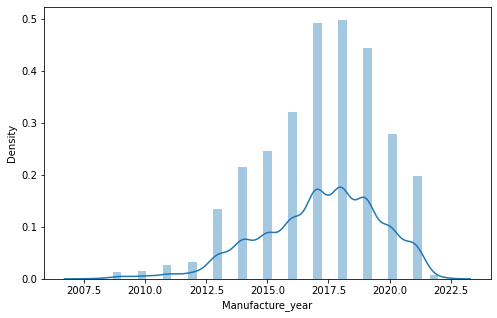

In [27]:
# display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Manufacture_year'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

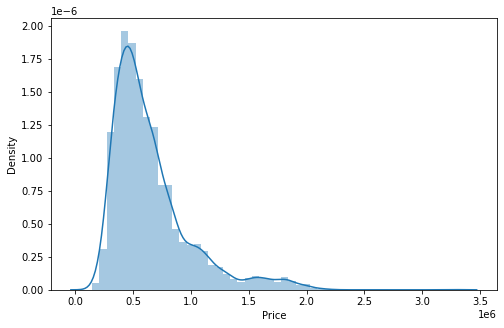

In [28]:
# display distplot of columns.
plt.figure(figsize=(8,5))
sns.distplot(df['Price'])

# Remove skewness and outliers

In [29]:
# Check skewness
df.skew()

Driven_KM           2.230208
Manufacture_year   -0.579318
Price               1.734693
dtype: float64

In [30]:
# Remove skewness using log transform and sqrt method.
import numpy as np
df['Driven_KM']=np.sqrt(df['Driven_KM'])
df['Price'] = np.sqrt(df['Price'])
df.skew()

Driven_KM           0.368020
Manufacture_year   -0.579318
Price               1.067382
dtype: float64

In [31]:
df['Price'] = np.sqrt(df['Price'])
df.skew()

Driven_KM           0.368020
Manufacture_year   -0.579318
Price               0.754899
dtype: float64

array([[<AxesSubplot:title={'center':'Driven_KM'}>,
        <AxesSubplot:title={'center':'Manufacture_year'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

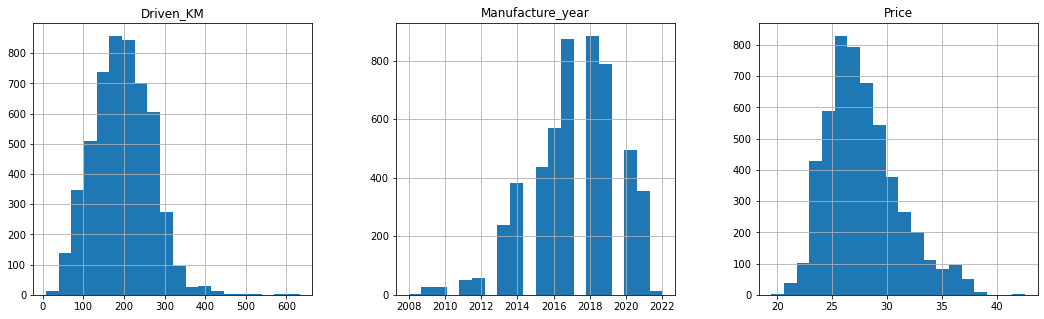

In [32]:
# display histogram of columns after remove skewnwss.
df.hist(figsize=(18,5), layout=(1,3), sharex=False, bins=20)

Driven_KM              AxesSubplot(0.125,0.125;0.227941x0.755)
Manufacture_year    AxesSubplot(0.398529,0.125;0.227941x0.755)
Price               AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

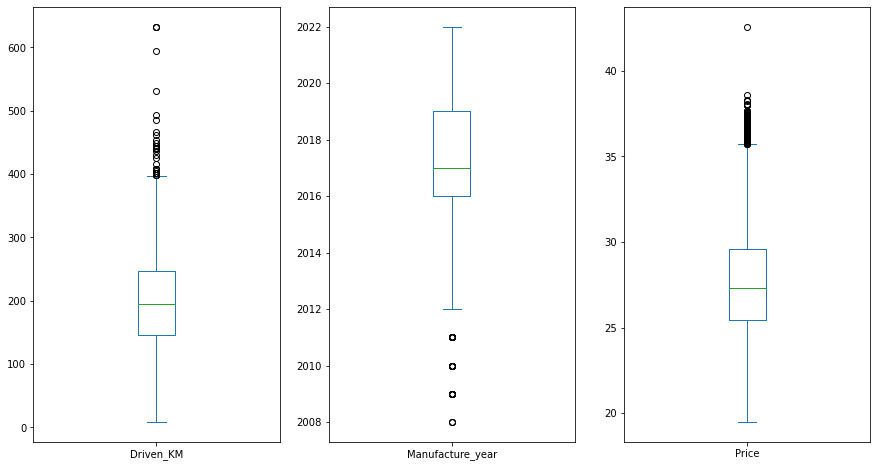

In [33]:
# checking outliers with boxplot.
df.plot(kind='box', subplots=True, layout=(1,3), figsize=(15,8))

In [34]:
# create dataframe for numeric column.
numeric_data = df.select_dtypes(include=[np.number])
numeric_data

,Driven_KM,Manufacture_year,Price
0,97.519229,2021,32.143404
1,91.318125,2016,24.104620
2,146.955776,2020,31.927450
3,129.942295,2019,27.623997
4,120.287156,2020,27.632295
...,...,...,...
5192,226.347079,2019,23.716947
5193,276.935010,2015,22.513375
5194,121.799015,2020,25.813417
5195,153.931803,2017,26.939824


In [35]:
# Lets quantify.
from scipy.stats import zscore
(np.abs(zscore(numeric_data))<3).all()

Driven_KM           False
Manufacture_year    False
Price               False
dtype: bool

In [36]:
# detecting outliers.
from scipy.stats import zscore
z = np.abs(zscore(numeric_data))
print(np.where(z>3))

(array([  15,  169,  388,  627,  919,  943,  958,  963,  970, 1106, 1196,
       1231, 1414, 1443, 1452, 1474, 1531, 1596, 1601, 1605, 1707, 1807,
       1896, 2032, 2059, 2067, 2099, 2144, 2205, 2213, 2218, 2297, 2400,
       2444, 2640, 2674, 2702, 2744, 2868, 3141, 3195, 3236, 3236, 3556,
       3594, 3601, 3602, 3630, 3630, 3732, 3748, 3798, 3804, 3941, 4294,
       4335, 4360, 4363, 4650, 4791, 4857, 4881, 4891, 4894, 4922, 4935,
       5071], dtype=int64), array([2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1], dtype=int64))


In [37]:
# removing outliers.
dfnew = df[(z<3).all(axis=1)]
print('dfnew shape = ',dfnew.shape)

df = dfnew
print('df shape = ',df.shape)

dfnew shape =  (5132, 10)
df shape =  (5132, 10)


In [38]:
# resetting the dataFrame index after removing outliers.
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location,Price
0,Mahindra,XUV,1.2 W6 MT,Manual,97.519229,Petrol,1st Owner,2021,Ahmedabad,32.143404
1,Maruti,Alto,VXI Manual,Manual,91.318125,Petrol,1st Owner,2016,Ahmedabad,24.104620
2,Maruti,Ertiga,ZXI Plus SHVS Manual,Manual,146.955776,Petrol,2nd Owner,2020,Ahmedabad,31.927450
3,Maruti,Swift,LXI Manual,Manual,129.942295,Petrol,1st Owner,2019,Ahmedabad,27.623997
4,Volkswagen,Polo,Trendline 1.0 L Petrol Manual,Manual,120.287156,Petrol,1st Owner,2020,Ahmedabad,27.632295
...,...,...,...,...,...,...,...,...,...,...
5127,Maruti,Alto,LXI Manual,Manual,226.347079,Petrol,1st Owner,2019,Kochi,23.716947
5128,Maruti,Alto,VXI Manual,Manual,276.935010,Petrol,1st Owner,2015,Kochi,22.513375
5129,Maruti,Eeco,5 STR WITH AC PLUSHTR Manual,Manual,121.799015,Petrol,1st Owner,2020,Kochi,25.813417
5130,Hyundai,Grand,SPORTZ (O) 1.2 AT VTVT Automatic,Automatic,153.931803,Petrol,2nd Owner,2017,Kochi,26.939824


# Label Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list1 = ['Brand','Model','Variant','Transmission','Fuel_type','No. of owners','Location']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str)) 
df

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location,Price
0,10,95,63,1,97.519229,1,0,2021,0,32.143404
1,11,8,545,1,91.318125,1,0,2016,0,24.104620
2,11,31,651,1,146.955776,1,1,2020,0,31.927450
3,11,75,349,1,129.942295,1,0,2019,0,27.623997
4,18,60,500,1,120.287156,1,0,2020,0,27.632295
...,...,...,...,...,...,...,...,...,...,...
5127,11,8,349,1,226.347079,1,0,2019,6,23.716947
5128,11,8,545,1,276.935010,1,0,2015,6,22.513375
5129,11,27,184,1,121.799015,1,0,2020,6,25.813417
5130,5,39,442,0,153.931803,1,1,2017,6,26.939824


### Correlation matrix

In [40]:
# check correlation of columns.
df.corr()

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location,Price
Brand,1.000000,0.089643,0.403388,0.040299,-0.054377,0.038137,-0.064531,0.114219,0.010296,-0.146897
Model,0.089643,1.000000,0.180685,-0.025665,0.084021,-0.225378,0.006843,-0.121375,0.052334,0.068782
Variant,0.403388,0.180685,1.000000,0.069302,0.016872,0.016377,-0.034467,-0.040760,-0.026618,-0.178273
Transmission,0.040299,-0.025665,0.069302,1.000000,0.070872,-0.028742,-0.041065,-0.109195,-0.061721,-0.401787
Driven_KM,-0.054377,0.084021,0.016872,0.070872,1.000000,-0.402994,0.085945,-0.572914,0.025802,-0.150214
Fuel_type,0.038137,-0.225378,0.016377,-0.028742,-0.402994,1.000000,0.001016,0.238092,-0.169561,-0.253544
No. of owners,-0.064531,0.006843,-0.034467,-0.041065,0.085945,0.001016,1.000000,-0.192374,-0.050880,-0.084466
Manufacture_year,0.114219,-0.121375,-0.040760,-0.109195,-0.572914,0.238092,-0.192374,1.000000,-0.067567,0.420814
Location,0.010296,0.052334,-0.026618,-0.061721,0.025802,-0.169561,-0.050880,-0.067567,1.000000,0.097982
Price,-0.146897,0.068782,-0.178273,-0.401787,-0.150214,-0.253544,-0.084466,0.420814,0.097982,1.000000


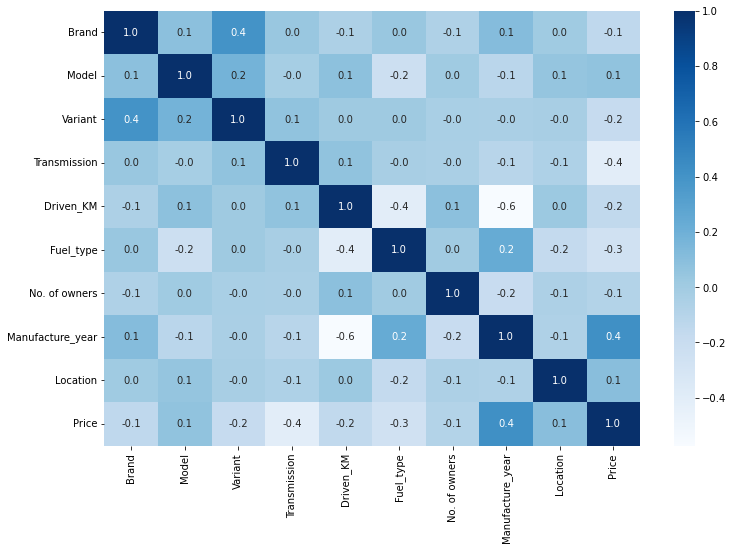

In [41]:
# check correlation matrix with heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt = '.1f', cmap = 'Blues')
#sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

# MultiCollinearity with Variance Inflation Factor (VIF)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
X = df.drop('Price',axis=1)
Y = df['Price']

In [44]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    print(vif)

In [45]:
calc_vif()

           Features  VIF Factor
0             Brand    7.578510
1             Model    3.616674
2           Variant    6.160173
3      Transmission    6.920690
4         Driven_KM   11.037897
5         Fuel_type    4.743261
6     No. of owners    1.270768
7  Manufacture_year   36.781172
8          Location    3.498028


### Data Preprocessing (split the data into independent 'x' and dependent 'y' datasets)

In [46]:
x = df.drop('Price',axis=1)
y = df['Price']

In [47]:
x.head()

,Brand,Model,Variant,Transmission,Driven_KM,Fuel_type,No. of owners,Manufacture_year,Location
0,10,95,63,1,97.519229,1,0,2021,0
1,11,8,545,1,91.318125,1,0,2016,0
2,11,31,651,1,146.955776,1,1,2020,0
3,11,75,349,1,129.942295,1,0,2019,0
4,18,60,500,1,120.287156,1,0,2020,0


In [48]:
y.head()

0    32.143404
1    24.104620
2    31.927450
3    27.623997
4    27.632295
Name: Price, dtype: float64

In [49]:
print(x.shape, y.shape)

(5132, 9) (5132,)


# Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x = st.fit_transform(x)
x

array([[ 0.25599352,  1.68925997, -1.65671813, ..., -0.4988746 ,
         1.61647718, -1.53744764],
       [ 0.51153889, -1.24634569,  0.93931325, ..., -0.4988746 ,
        -0.52325996, -1.53744764],
       [ 0.51153889, -0.47026603,  1.51022472, ...,  1.63999296,
         1.18852975, -1.53744764],
       ...,
       [ 0.51153889, -0.60523641, -1.00501731, ..., -0.4988746 ,
         1.18852975, -0.07032579],
       [-1.02173332, -0.20032528,  0.38455966, ...,  1.63999296,
        -0.09531253, -0.07032579],
       [-1.02173332, -0.74020678, -1.31201687, ..., -0.4988746 ,
         0.3326349 , -0.07032579]])

# Training process begins

#### Finding best random_state

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [52]:
model = [lr,rf,abr,gbr,dtr]
max_r2_score = 0
for r_state in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred_test = i.predict(x_test)
        r2_sc = r2_score(y_test,pred_test)
        print("R2 score correspond to random state ",r_state,"is",r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score = r2_sc
            final_state = r_state
            final_model = i

R2 score correspond to random state  0 is 0.4807862529115282
R2 score correspond to random state  0 is 0.9472287823495439
R2 score correspond to random state  0 is 0.6276511548840078
R2 score correspond to random state  0 is 0.8852325299635763
R2 score correspond to random state  0 is 0.9059749392762269
R2 score correspond to random state  1 is 0.44706740411152446
R2 score correspond to random state  1 is 0.940195549709397
R2 score correspond to random state  1 is 0.5886074374001493
R2 score correspond to random state  1 is 0.8650780166042737
R2 score correspond to random state  1 is 0.8973819983846878
R2 score correspond to random state  2 is 0.4829853081477473
R2 score correspond to random state  2 is 0.949278449024652
R2 score correspond to random state  2 is 0.6318258086295885
R2 score correspond to random state  2 is 0.8768670966488437
R2 score correspond to random state  2 is 0.9151418831165464
R2 score correspond to random state  3 is 0.4420868858361279
R2 score correspond to ra

R2 score correspond to random state  27 is 0.9484602897500267
R2 score correspond to random state  27 is 0.5803676197684668
R2 score correspond to random state  27 is 0.8765611105103466
R2 score correspond to random state  27 is 0.9226032291572199
R2 score correspond to random state  28 is 0.4476553698814767
R2 score correspond to random state  28 is 0.9443768117829988
R2 score correspond to random state  28 is 0.6260344505666742
R2 score correspond to random state  28 is 0.8758111292009232
R2 score correspond to random state  28 is 0.8918095687008989
R2 score correspond to random state  29 is 0.4471722991208773
R2 score correspond to random state  29 is 0.9462544781169486
R2 score correspond to random state  29 is 0.6250010546202858
R2 score correspond to random state  29 is 0.8684701716841897
R2 score correspond to random state  29 is 0.9110163263745132
R2 score correspond to random state  30 is 0.4849907342730264
R2 score correspond to random state  30 is 0.9469292309292309
R2 score

R2 score correspond to random state  54 is 0.9497517372693001
R2 score correspond to random state  54 is 0.6127277710310375
R2 score correspond to random state  54 is 0.8796434941266968
R2 score correspond to random state  54 is 0.9157779814883956
R2 score correspond to random state  55 is 0.4537772496702991
R2 score correspond to random state  55 is 0.9493931797610982
R2 score correspond to random state  55 is 0.6400092153264104
R2 score correspond to random state  55 is 0.8804892823706129
R2 score correspond to random state  55 is 0.935028451756069
R2 score correspond to random state  56 is 0.4798318549780669
R2 score correspond to random state  56 is 0.9543660202279983
R2 score correspond to random state  56 is 0.6574386733888804
R2 score correspond to random state  56 is 0.8858277211519364
R2 score correspond to random state  56 is 0.9193631045843838
R2 score correspond to random state  57 is 0.46556591057331864
R2 score correspond to random state  57 is 0.9525835612337383
R2 score

R2 score correspond to random state  81 is 0.9291031259297063
R2 score correspond to random state  81 is 0.6464609057759538
R2 score correspond to random state  81 is 0.8719508893754843
R2 score correspond to random state  81 is 0.8899600096850245
R2 score correspond to random state  82 is 0.49219584648187165
R2 score correspond to random state  82 is 0.9488194554946036
R2 score correspond to random state  82 is 0.6679473078609088
R2 score correspond to random state  82 is 0.8758178656073816
R2 score correspond to random state  82 is 0.9188239143583536
R2 score correspond to random state  83 is 0.4828342578167104
R2 score correspond to random state  83 is 0.9523755645490362
R2 score correspond to random state  83 is 0.5964078188509176
R2 score correspond to random state  83 is 0.874288889894851
R2 score correspond to random state  83 is 0.9328380737679365
R2 score correspond to random state  84 is 0.4544991332893139
R2 score correspond to random state  84 is 0.9539707397042927
R2 score

In [53]:
print("max R2 score correspond to random state ",final_state,"is",max_r2_score,"and model is",final_model)

max R2 score correspond to random state  90 is 0.9643974488868489 and model is RandomForestRegressor()


# Creating train-test split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 90)

### Apply best model

In [55]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score :- ",r2_score(y_test,pred))

r2 score :-  0.9645837930848378


In [56]:
# Predict the value:
print("predicted car price:",pred)
print("actual car price",y_test)

predicted car price: [25.96966933 29.60315804 26.76114667 ... 24.47729333 28.87047818
 23.31595034]
actual car price 2448    25.452737
1583    29.717317
3321    28.234410
570     30.667215
4067    27.474539
          ...    
992     33.837358
3072    29.382087
374     24.242660
929     28.504847
3875    23.338827
Name: Price, Length: 1027, dtype: float64


### Check MAE, MSE and RMSE

In [57]:
# Display MAE, MSE and RMSE:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 0.41438353540704836
mean squared error 0.3906260014904591
Root mean squared error 0.6250008011918537


In [58]:
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred)
for i in range(2,10):
    lsscore = cross_val_score(rf,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("r2 score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 81.4732889878751
r2 score is :- 96.45837930848377


At cv:- 3
cross validation score is :- 91.53606223513214
r2 score is :- 96.45837930848377


At cv:- 4
cross validation score is :- 91.31372194279645
r2 score is :- 96.45837930848377


At cv:- 5
cross validation score is :- 92.31805246030427
r2 score is :- 96.45837930848377


At cv:- 6
cross validation score is :- 92.36019858887084
r2 score is :- 96.45837930848377


At cv:- 7
cross validation score is :- 92.46320447977736
r2 score is :- 96.45837930848377


At cv:- 8
cross validation score is :- 93.06020016465925
r2 score is :- 96.45837930848377


At cv:- 9
cross validation score is :- 93.16398804283632
r2 score is :- 96.45837930848377




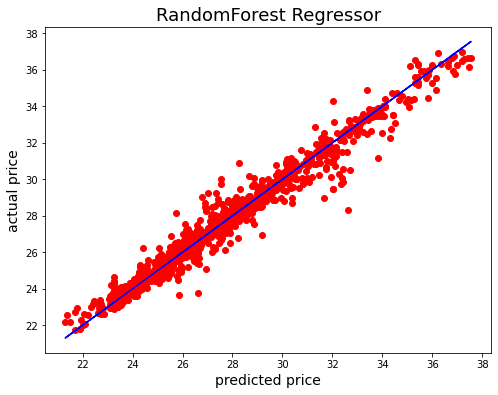

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred, color = 'r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("predicted price",fontsize=14)
plt.ylabel("actual price",fontsize=14)
plt.title("RandomForest Regressor",fontsize=18)
plt.show()

Observation :- Best fit line is covering most of the datapoints which shows good fit of our model.

# Hypertuning of the model:

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 9, verbose=2, random_state=90, n_jobs = 1)

In [64]:
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, m

RandomizedSearchCV(cv=9, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=90, scoring='neg_mean_squared_error',
                   verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [66]:
rf = RandomForestRegressor(n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print("R2 score:",rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print("Cross Val Score is",rfc*100)

R2 score: 94.83165879115599
Cross Val Score is 91.68902393232194


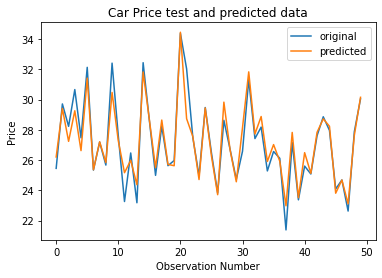

In [67]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, pred_decision[:number_of_observations], label="predicted")

plt.title("Car Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Model Saving:

In [68]:
import pickle
filename = 'car_price.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [69]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':pred_decision},index=range(len(a)))
df_comp

,original,predicted
0,25.452737,26.205690
1,29.717317,29.419181
2,28.234410,27.240314
3,30.667215,29.265376
4,27.474539,26.627484
...,...,...
1022,33.837358,33.344751
1023,29.382087,29.709850
1024,24.242660,24.627506
1025,28.504847,29.300742
